Get dependencies.

In [60]:
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt

The following function will be used to visualize distributions.

In [61]:
def visualize(distribution, name):
  parameter_domain = np.linspace(0,1,101)
  plt.figure(figsize=(5,4))
  plt.plot(parameter_domain, distribution.pdf(parameter_domain), label = name)
  plt.legend();

Create the 3 games (slot machines), where $θ_A = a$, $\theta _B = b$, $\theta _C = c$ are the corresponding probabilities of success.

In [63]:
a,b,c = 0.3, 0.4, 0.5

slotA = stats.binom(n=1, p=a)
slotB = stats.binom(n=1, p=b)
slotC = stats.binom(n=1, p=c)

We define the parameters for the three prior distributions. Each machine starts with a flat prior $Beta(1,1)$ ~ $Unif[0,1]$.

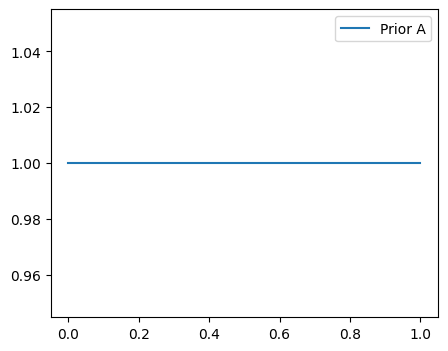

In [68]:
A_alpha, A_beta, B_alpha, B_beta, C_alpha, C_beta = 1,1,1,1,1,1

# Visualize an example of one of the priors
visualize(stats.beta(a = A_alpha, b = A_beta), "Prior A")

We will use simulation and sample from each of the three prior distributions, and treat the samples as potential values of the parameters $θ_A$, $θ_B$ and $θ_C$.

We will then choose to play the machine with the highest success probability, and then use the result to update our beliefs and create a posterior distribution for the machine we played. This posterior will become the prior for the next sequential update. Recall that the posterior for the Beta-Binomial is $Beta(x + \alpha, n-x+\beta)$.

The algorithm will run until a particular slot machine has been played $l$ times in a row, indicating some form of "convergence" to a particular machine. In this particular case, we have set $l = 10$, but this can be varied as needed. See the comments in the code below.


The winner is slot machine C!


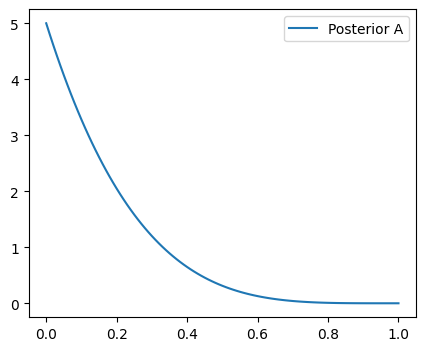

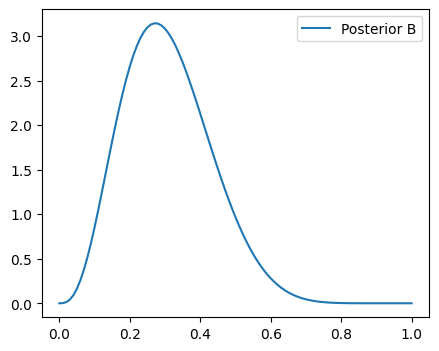

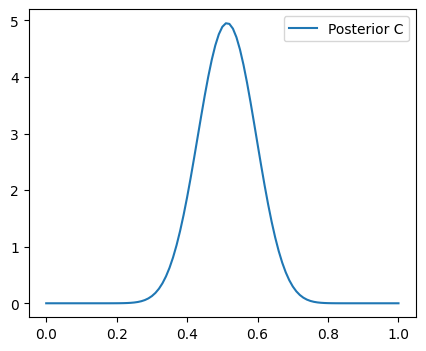

In [69]:
most_recent = None  # The machine that was played last
k = 0  # Counts consecutive plays of current machine
l = 10  # Particular value of l

while k < l:
  # Get the samples
  A = stats.beta(a = A_alpha, b = A_beta).rvs(size = 1)
  B = stats.beta(a = B_alpha, b = B_beta).rvs(size = 1)
  C = stats.beta(a = C_alpha, b = C_beta).rvs(size = 1)

  if (A > B) and (A > C):
    # Game A had largest probability. Play game A.
    result = slotA.rvs(size = 1)

    # Update A parameters
    A_alpha = result + A_alpha
    A_beta = 1 - result + A_beta

    # Update counters
    if most_recent == "A":
      k += 1
    else:
      most_recent = "A"
      k = 1

  elif (B > C):
    # Game B had largest probability. Play game B.
    result = slotB.rvs(size = 1)

    # Update B parameters
    B_alpha = result + B_alpha
    B_beta = 1 - result + B_beta

    # Update counters
    if most_recent == "B":
      k += 1
    else:
      most_recent = "B"
      k = 1

  else:
    # Game C had largest probability. Play game C.
    result = slotC.rvs(size = 1)

    # Update C parameters
    C_alpha = result + C_alpha
    C_beta = 1 - result + C_beta

    # Update counters
    if most_recent == "C":
      k += 1
    else:
      most_recent = "C"
      k = 1

# Visualize the final posterior distributions.
visualize(stats.beta(a = A_alpha, b = A_beta), "Posterior A")
visualize(stats.beta(a = B_alpha, b = B_beta), "Posterior B")
visualize(stats.beta(a = C_alpha, b = C_beta), "Posterior C")

# Display which machine the algorithm thinks is the best.
print("The winner is slot machine "+most_recent+"!")

Note: Here, we had $θ_A = 0.3$, $\theta _B = 0.4$, $\theta _C = 0.5$, and $l = 10$ was enough for the algorithm to succeed most of the time. If the true parameters were closer together, we may need $l > 10$ to increase the chances we are correct. Similarly, if the true parameters are spread out well, we could use $l < 10$. Of course, this information may not be available!